In [2]:
# Dependencies and Setup
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

In [3]:
# Files to load
heart_data_to_load = r"C:\Users\RyanF\Documents\Bootcamp Challenges\Project-1\Resources\heart.csv"
heart_predict_to_load = r"C:\Users\RyanF\Documents\Bootcamp Challenges\Project-1\Resources\Heart_Disease_Prediction.csv"


In [6]:
# read heart and heart disease prediction csv
heart_data = pd.read_csv(heart_data_to_load)


In [7]:
# assign heart_data DataFrame
heart_data_df = pd.DataFrame(heart_data)



In [8]:
#disply heart_data DataFrame
heart_data_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [8]:
#disply heart_data_df
heart_data_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [9]:
# checking for NaN values in merge dataframe
nan_columns = heart_data_df.isna().any()
print("Columns with NaN values:")
print(nan_columns)

Columns with NaN values:
age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool


In [13]:
# Check for duplicate rows
duplicate_rows = heart_data_df.duplicated()

# number of duplicate rows
num_duplicates = heart_data_df.duplicated().sum()

print(f"Number of duplicate rows: {num_duplicates}")

# Print the duplicate rows
print(duplicate_rows)

Number of duplicate rows: 723
0       False
1       False
2       False
3       False
4       False
        ...  
1020     True
1021     True
1022     True
1023     True
1024     True
Length: 1025, dtype: bool


In [15]:
# drop duplicate rows
heart_data_clean = heart_data_df.drop_duplicates()

# disply df
heart_data_clean

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [16]:
heart_data_clean.describe(include = 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


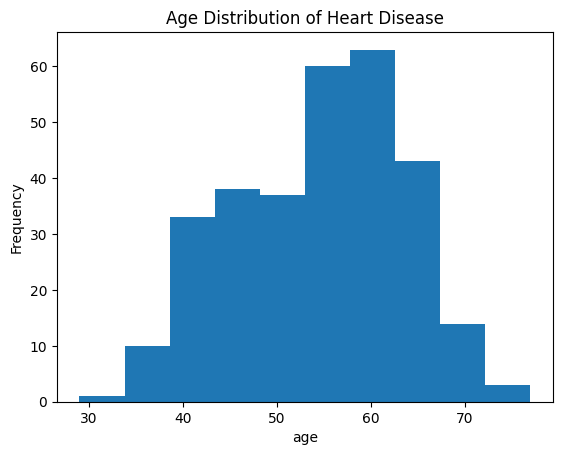

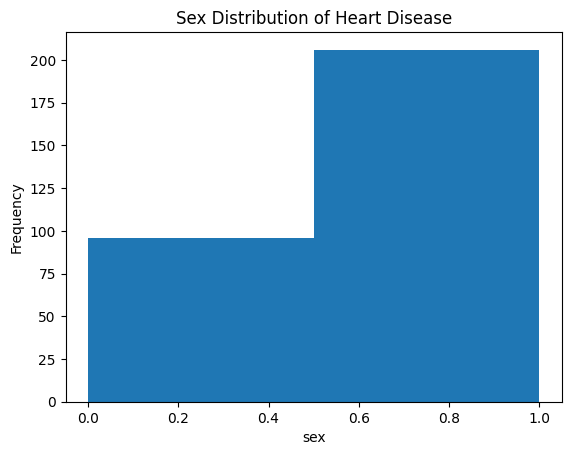

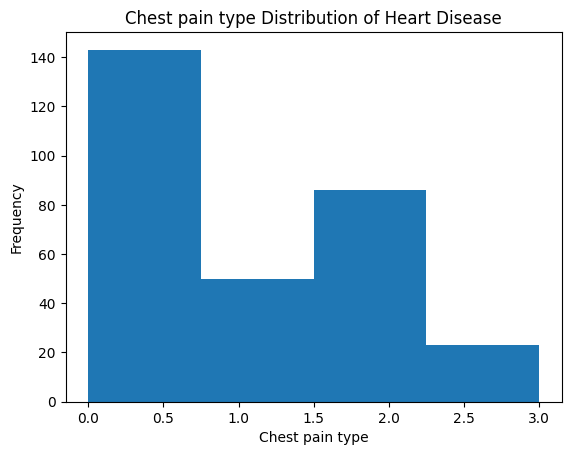

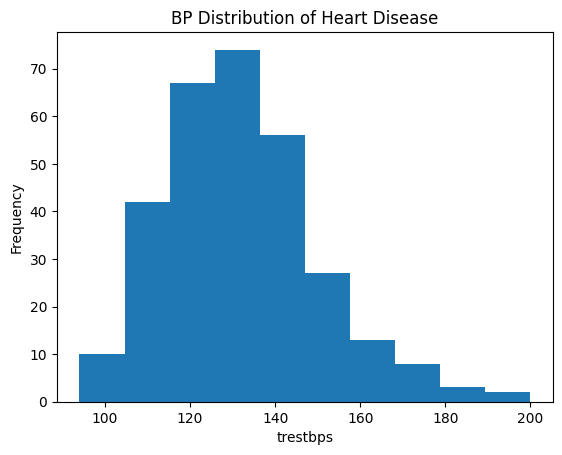

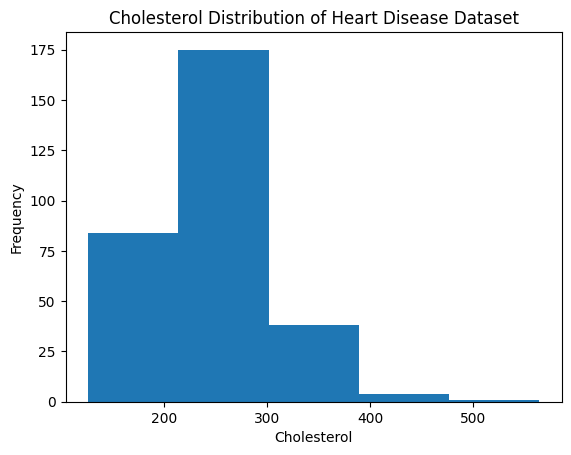

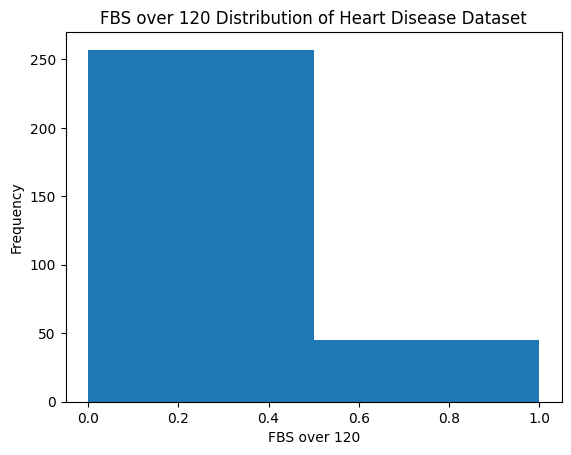

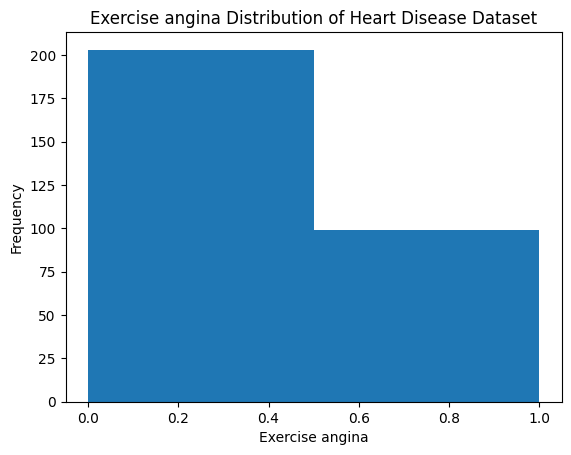

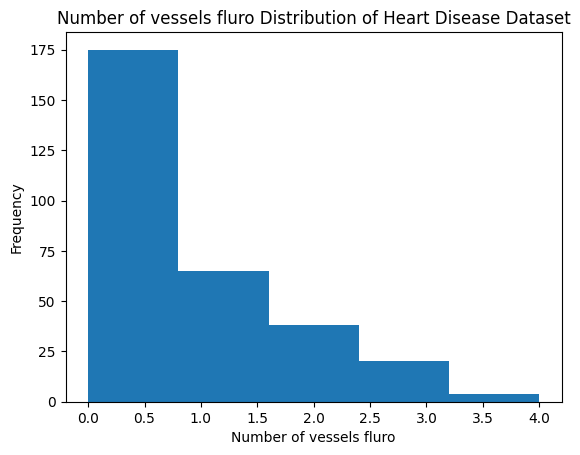

In [19]:
#Disply Histogram of each column

# Age Hist.
plt.hist(heart_data_clean['age'], bins=10)
plt.xlabel('age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Heart Disease')
plt.show()

#Sex Histogram
plt.hist(heart_data_clean['sex'], bins=2)
plt.xlabel('sex')
plt.ylabel('Frequency')
plt.title('Sex Distribution of Heart Disease')
plt.show()

# Chest pain type Histogram
plt.hist(heart_data_clean['cp'], bins=4)
plt.xlabel('Chest pain type')
plt.ylabel('Frequency')
plt.title('Chest pain type Distribution of Heart Disease')
plt.show()


plt.hist(heart_data_clean['trestbps'], bins=10)
plt.xlabel('trestbps')
plt.ylabel('Frequency')
plt.title('BP Distribution of Heart Disease')
plt.show()


plt.hist(heart_data_clean['chol'], bins=5)
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.title('Cholesterol Distribution of Heart Disease Dataset')
plt.show()


plt.hist(heart_data_clean['fbs'], bins=2)
plt.xlabel('FBS over 120')
plt.ylabel('Frequency')
plt.title('FBS over 120 Distribution of Heart Disease Dataset')
plt.show()


plt.hist(heart_data_clean['exang'], bins=2)
plt.xlabel('Exercise angina')
plt.ylabel('Frequency')
plt.title('Exercise angina Distribution of Heart Disease Dataset')
plt.show()


plt.hist(heart_data_clean['ca'], bins=5)
plt.xlabel('Number of vessels fluro')
plt.ylabel('Frequency')
plt.title('Number of vessels fluro Distribution of Heart Disease Dataset')
plt.show()



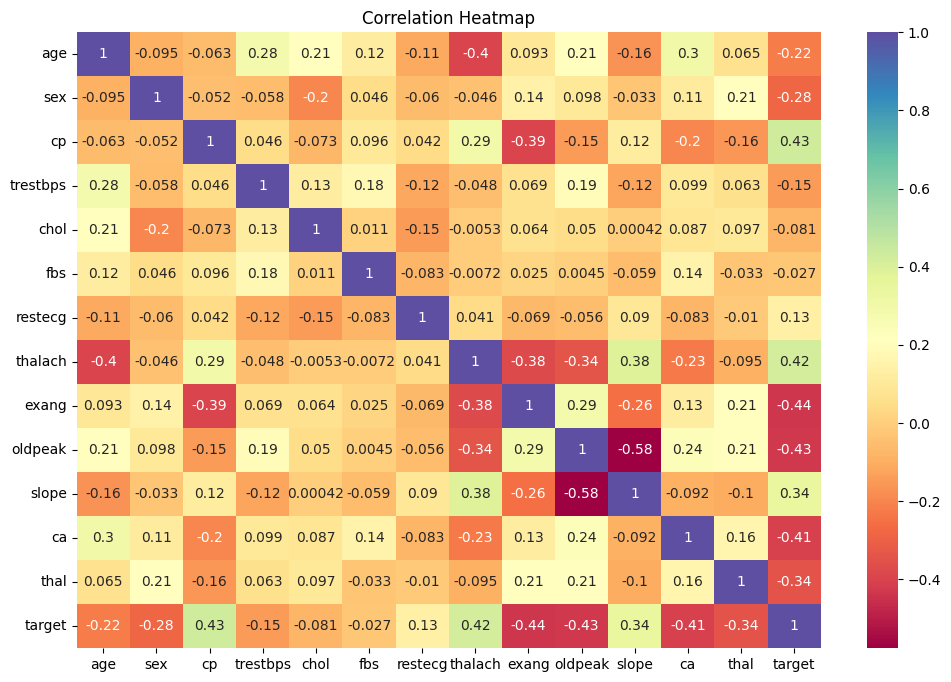

In [24]:
# Correlation matrix
correlation_matrix = heart_data_clean.corr()

plt.figure(figsize= (12, 8))

# Heatmap of correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral')
plt.title('Correlation Heatmap')
plt.show()
